In [156]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
data = pd.read_csv('master.csv')




In [158]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [157]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [163]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file into a DataFrame
data = pd.read_csv('imputed_dataset02.csv')




In [164]:
data.shape

(27820, 12)

In [126]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [120]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv("imputed_dataset02.csv")

# # Convert numeric columns with commas as thousand separators to appropriate numeric data types
# numeric_cols = [" gdp_for_year ($) "]  # Replace with actual column names
# data[numeric_cols] = data[numeric_cols].replace({",": ""}, regex=True).astype(float)


# # # Handle missing values using mean imputation
# # imputer = SimpleImputer(strategy="mean")
# # data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

In [121]:
# Check for remaining missing values
missing_values = data.isnull().sum()
if missing_values.sum() > 0:
    print("Warning: The dataset still contains missing values. Please handle them before proceeding with clustering.")
    # Optionally, you can apply further imputation or handle missing values based on your data.

In [100]:
# # Calculate the mean of available HDI values (excluding missing values)
# available_hdi_mean = data["HDI for year"].mean()

# # Function to impute missing HDI values based on the mean of available HDI values
# def impute_hdi(row):
#     if pd.isnull(row["HDI for year"]):
#         return available_hdi_mean
#     return row["HDI for year"]

# # Apply the impute_hdi function to fill missing HDI values
# data["HDI for year"] = data.apply(impute_hdi, axis=1)

# # Save the updated DataFrame to a new CSV file
# data.to_csv("imputed_dataset.csv", index=False)

In [110]:
# Interpolate the missing values using linear interpolation
data["HDI for year"] = data["HDI for year"].interpolate(method='linear')

# Save the updated DataFrame to a new CSV file
data.to_csv("imputed_dataset02.csv", index=False)

In [111]:
# # Group by "country" and calculate the mean HDI for each country
# hdi_means_by_country = data.groupby("country")["HDI for year"].mean()

# # Iterate through the DataFrame and impute missing values in "HDI for year" based on the country's mean HDI
# for index, row in data.iterrows():
#     country = row["country"]
#     hdi = row["HDI for year"]
#     if pd.isnull(hdi):  # Check if the value is missing
#         data.at[index, "HDI for year"] = hdi_means_by_country[country]

# # Save the updated DataFrame to a new CSV file
# data.to_csv("imputed_dataset.csv", index=False)

In [122]:
# Load the data from the CSV file into a DataFrame
data = pd.read_csv('imputed_dataset02.csv')

In [123]:
# # Perform label encoding for the "generation" column

# label_encoder = LabelEncoder()
# data["generation_encoded"] = label_encoder.fit_transform(data["generation"])

# data["country_encoded"] = label_encoder.fit_transform(data["country"])

# data["sex_encoded"] = label_encoder.fit_transform(data["sex"])

# data["age_encoded"] = label_encoder.fit_transform(data["age"])

# data["country-year_encoded"] = label_encoder.fit_transform(data["country-year"])


# # Drop the original "generation" column if you prefer
# data.drop("generation", axis=1, inplace=True)

# data.drop("country", axis=1, inplace=True)
# data.drop("sex", axis=1, inplace=True)
# data.drop("age", axis=1, inplace=True)
# data.drop("country-year", axis=1, inplace=True)

# # Convert the DataFrame to a numpy array (required for K-means)
# X = data.values

In [1]:
# Choose the number of clusters (K) - You need to set this based on your problem
k = 7

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
data["cluster_label"] = kmeans.fit_predict(X)

# Display the cluster centers and counts
cluster_centers = kmeans.cluster_centers_
cluster_counts = data["cluster_label"].value_counts()

In [86]:
print("Cluster Centers:")
print(cluster_centers)
print("\nCluster Counts:")
print(cluster_counts)

# Save the clustered data back to a new CSV file
data.to_csv("clustered_dataset03.csv", index=False)

Cluster Centers:
[[2.00095920e+03 1.36021480e+02 1.10051411e+06 1.25987132e+01
  7.73297258e-01 1.22844867e+11 1.50735027e+04 2.68808000e+00
  4.84255200e+01 5.00000000e-01 2.49936000e+00 1.14009328e+03]
 [1.99900000e+03 2.56842424e+03 2.13969889e+07 1.30770455e+01
  7.95310030e-01 9.64554891e+12 3.73742727e+04 2.66666667e+00
  9.80000000e+01 5.00000000e-01 2.50000000e+00 2.25400000e+03]
 [2.00174419e+03 2.00522481e+03 1.11614490e+07 1.80724225e+01
  8.14321678e-01 4.69494610e+12 3.78575116e+04 2.67441860e+00
  5.45813953e+01 5.00000000e-01 2.50000000e+00 1.30232558e+03]
 [2.00438235e+03 7.61833824e+02 5.91088232e+06 1.41060294e+01
  8.01647802e-01 1.76266309e+12 2.98385412e+04 2.85098039e+00
  5.20411765e+01 5.00000000e-01 2.50000000e+00 1.22617059e+03]
 [2.01000000e+03 3.18192424e+03 2.39954210e+07 1.32436364e+01
  8.49091431e-01 1.54038148e+13 5.34012727e+04 3.15151515e+00
  9.80000000e+01 5.00000000e-01 2.50000000e+00 2.26500000e+03]]

Cluster Counts:
0    25000
3     2040
2      5

new iteration with 4 clusters and random state = 21

In [76]:
# Choose the number of clusters (K) - You need to set this based on your problem
k = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=21, n_init=10)
data["cluster_label"] = kmeans.fit_predict(X)

# Display the cluster centers and counts
cluster_centers = kmeans.cluster_centers_
cluster_counts = data["cluster_label"].value_counts()

In [77]:
print("Cluster Centers:")
print(cluster_centers)
print("\nCluster Counts:")
print(cluster_counts)

# Save the clustered data back to a new CSV file
data.to_csv("clustered_dataset02.csv", index=False)

Cluster Centers:
[[2.00096498e+03 1.36028586e+02 1.10277999e+06 1.25940848e+01
  7.73290398e-01 1.23241989e+11 1.50727972e+04 1.14057444e+03]
 [2.00700000e+03 2.96420098e+03 2.33441328e+07 1.29229902e+01
  8.29765381e-01 1.38101354e+13 4.89942353e+04 2.26200000e+03]
 [2.00031818e+03 2.17791477e+03 1.26424086e+07 1.81228409e+01
  8.12782575e-01 5.20460721e+12 3.68056818e+04 1.45304545e+03]
 [2.00446821e+03 7.66588150e+02 5.92583358e+06 1.41307466e+01
  8.02063177e-01 1.80550757e+12 3.02485607e+04 1.21171676e+03]]

Cluster Counts:
0    25012
3     2076
2      528
1      204
Name: cluster_label, dtype: int64


In [95]:
# Choose the number of clusters (K) - You need to set this based on your problem
k = 10

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=84, n_init=10)
data["cluster_label"] = kmeans.fit_predict(X)

# Display the cluster centers and counts
cluster_centers = kmeans.cluster_centers_
cluster_counts = data["cluster_label"].value_counts()

In [96]:
print("Cluster Centers:")
print(cluster_centers)
print("\nCluster Counts:")
print(cluster_counts)

# Save the clustered data back to a new CSV file
data.to_csv("clustered_dataset04.csv", index=False)

Cluster Centers:
[[2.00295027e+03 3.71863677e+02 2.79993614e+06 1.33088921e+01
  7.97452612e-01 4.08825896e+11 2.91908717e+04 2.77042629e+00
  4.95528419e+01 5.00000000e-01 2.49911190e+00 1.16198313e+03]
 [2.00700000e+03 2.90758333e+03 2.33891386e+07 1.25494048e+01
  8.12715106e-01 1.39719814e+13 4.97458571e+04 3.28571429e+00
  9.80000000e+01 5.00000000e-01 2.50000000e+00 2.26200000e+03]
 [2.00636842e+03 8.51563596e+02 7.12407381e+06 1.29849342e+01
  8.19968965e-01 2.85610321e+12 3.83071053e+04 2.93859649e+00
  5.02368421e+01 5.00000000e-01 2.50000000e+00 1.17863158e+03]
 [2.00046544e+03 7.91913488e+01 6.53028056e+05 1.24737465e+01
  7.67527642e-01 4.52971513e+10 1.17013859e+04 2.66746126e+00
  4.80528407e+01 5.00000000e-01 2.49940405e+00 1.13237982e+03]
 [1.99754545e+03 2.50944697e+03 1.71107384e+07 1.64246970e+01
  8.22964262e-01 6.57846626e+12 3.43627273e+04 2.34848485e+00
  8.38181818e+01 5.00000000e-01 2.50000000e+00 1.94572727e+03]
 [2.01300000e+03 3.47008333e+03 2.46048677e+07 1

In [127]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("imputed_dataset02.csv")

# Get the count of missing values in each column
missing_values_count = data.isnull().sum()

# Print the column names and the number of missing values in each column
for column, count in missing_values_count.iteritems():
    print(f"Column '{column}' has {count} missing value(s).")


Column 'year' has 0 missing value(s).
Column 'suicides_no' has 0 missing value(s).
Column 'population' has 0 missing value(s).
Column 'suicides/100k pop' has 0 missing value(s).
Column 'HDI for year' has 0 missing value(s).
Column ' gdp_for_year ($) ' has 0 missing value(s).
Column 'gdp_per_capita ($)' has 0 missing value(s).
Column 'generation_encoded' has 0 missing value(s).
Column 'country_encoded' has 0 missing value(s).
Column 'sex_encoded' has 0 missing value(s).
Column 'age_encoded' has 0 missing value(s).
Column 'country-year_encoded' has 0 missing value(s).


/var/folders/qd/1y93brzs3b141wp8rl1hhp540000gn/T/ipykernel_5266/3691119105.py:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, count in missing_values_count.iteritems():


In [129]:
# Convert the DataFrame to a numpy array (required for K-means)
X = data.values

In [130]:
# Choose the number of clusters (K) - You need to set this based on your problem
k = 7

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=21, n_init=10)
data["cluster_label"] = kmeans.fit_predict(X)

# Display the cluster centers and counts
cluster_centers = kmeans.cluster_centers_
cluster_counts = data["cluster_label"].value_counts()

In [131]:
print("Cluster Centers:")
print(cluster_centers)
print("\nCluster Counts:")
print(cluster_counts)

# Save the clustered data back to a new CSV file
data.to_csv("clustered_dataset05.csv", index=False)

Cluster Centers:
[[2.00061878e+03 8.61172700e+01 6.98405320e+05 1.25134813e+01
  7.41816997e-01 5.58198631e+10 1.25789782e+04 2.67505656e+00
  4.79076169e+01 5.00000000e-01 2.49943439e+00 1.12890347e+03]
 [2.01000000e+03 3.18192424e+03 2.39954210e+07 1.32436364e+01
  8.96363636e-01 1.54038091e+13 5.34012727e+04 3.15151515e+00
  9.80000000e+01 5.00000000e-01 2.50000000e+00 2.26500000e+03]
 [2.00602941e+03 8.95553922e+02 6.93635759e+06 1.34548775e+01
  8.52553568e-01 2.62984250e+12 3.57608824e+04 2.93137255e+00
  4.94411765e+01 5.00000000e-01 2.50000000e+00 1.16658824e+03]
 [1.99950000e+03 2.56590833e+03 2.15315702e+07 1.29178333e+01
  8.83700000e-01 9.87922700e+12 3.80742000e+04 2.73333333e+00
  9.80000000e+01 5.00000000e-01 2.50000000e+00 2.25450000e+03]
 [1.99980000e+03 2.30317619e+03 1.25157043e+07 1.92205000e+01
  8.61123324e-01 5.06142286e+12 3.61186857e+04 2.57142857e+00
  6.05428571e+01 5.00000000e-01 2.50000000e+00 1.44237143e+03]
 [2.00370270e+03 6.92082583e+02 5.36145504e+06 1

/Users/siddharthmadan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/siddharthmadan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/siddharthmadan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/siddharthmadan/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

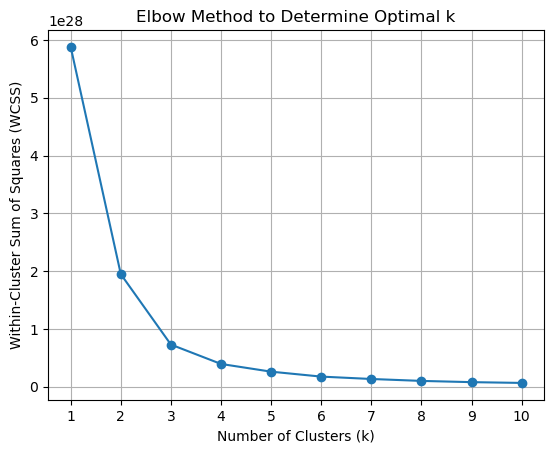

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read the dataset
data = pd.read_csv("imputed_dataset02.csv")

# # Select the features for clustering (excluding any non-numeric or non-essential columns)
# X = data.drop(columns=["non_numeric_column1", "non_numeric_column2"])

# Initialize an empty list to store the WCSS values for different k
wcss = []

# Define a range of k values to try (for example, 1 to 10)
k_values = range(1, 11)

# Calculate WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters (k)
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method to Determine Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()


for k=3

In [133]:
# Choose the number of clusters (K) - You need to set this based on your problem
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=21, n_init=10)
data["cluster_label"] = kmeans.fit_predict(X)

# Display the cluster centers and counts
cluster_centers = kmeans.cluster_centers_
cluster_counts = data["cluster_label"].value_counts()

In [134]:
print("Cluster Centers:")
print(cluster_centers)
print("\nCluster Counts:")
print(cluster_counts)

# Save the clustered data back to a new CSV file
data.to_csv("cluster03.csv", index=False)

Cluster Centers:
[[2.00388235e+03 1.30511625e+03 8.64126259e+06 1.49871569e+01
  8.54616702e-01 3.34087336e+12 3.55454958e+04 2.81652661e+00
  5.20336134e+01 5.00000000e-01 2.50000000e+00 1.23212605e+03]
 [2.00600000e+03 2.92005263e+03 2.30790439e+07 1.29770175e+01
  8.91793233e-01 1.32878900e+13 4.75636842e+04 3.01754386e+00
  9.80000000e+01 5.00000000e-01 2.50000000e+00 2.26100000e+03]
 [2.00107384e+03 1.61249885e+02 1.28880956e+06 1.26962013e+01
  7.55529219e-01 1.75648060e+11 1.55794814e+04 2.69286042e+00
  4.87001223e+01 5.00000000e-01 2.49938847e+00 1.14650833e+03]]

Cluster Counts:
2    26164
0     1428
1      228
Name: cluster_label, dtype: int64


for k=4

In [135]:
# Choose the number of clusters (K) - You need to set this based on your problem
k = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=21, n_init=10)
data["cluster_label"] = kmeans.fit_predict(X)

# Display the cluster centers and counts
cluster_centers = kmeans.cluster_centers_
cluster_counts = data["cluster_label"].value_counts()

In [136]:
print("Cluster Centers:")
print(cluster_centers)
print("\nCluster Counts:")
print(cluster_counts)

# Save the clustered data back to a new CSV file
data.to_csv("cluster04.csv", index=False)

Cluster Centers:
[[2.00096498e+03 1.36028586e+02 1.10277999e+06 1.25940848e+01
  7.53004654e-01 1.23241982e+11 1.50727972e+04 2.68822965e+00
  4.84469055e+01 5.00000000e-01 2.49936031e+00 1.14057444e+03]
 [2.00700000e+03 2.96420098e+03 2.33441328e+07 1.29229902e+01
  8.93239496e-01 1.38101306e+13 4.89942353e+04 3.09803922e+00
  9.80000000e+01 5.00000000e-01 2.50000000e+00 2.26200000e+03]
 [2.00031818e+03 2.17791477e+03 1.26424086e+07 1.81228409e+01
  8.66096707e-01 5.20460750e+12 3.68056818e+04 2.57954545e+00
  6.12954545e+01 5.00000000e-01 2.50000000e+00 1.45304545e+03]
 [2.00446821e+03 7.66588150e+02 5.92583358e+06 1.41307466e+01
  8.27416027e-01 1.80550773e+12 3.02485607e+04 2.85838150e+00
  5.14104046e+01 5.00000000e-01 2.50000000e+00 1.21171676e+03]]

Cluster Counts:
0    25012
3     2076
2      528
1      204
Name: cluster_label, dtype: int64


In [137]:
pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 16.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894072 sha256=7400139f4ca389ce6baa91008514ec6183e4fa25c6d7cdd1e7b380eddac0f3f7
  Stored in directory: /Users/siddharthmadan/Library/Caches/pip/wheels/49/7d/0b/d8426cdfc7fd0321111462d14dcfa2e2b5fa35936a496ee26c
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [138]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz

# Load data from the CSV file (replace 'data.csv' with your file name)
data = pd.read_csv('imputed_dataset02.csv')

# Prepare the data for FCM clustering
data_array = data.values

# Set the number of clusters you want to find (change 'n_clusters' to your desired value)
n_clusters = 3

# Set the fuzziness parameter (change 'fuzziness' to your desired value, typically between 1.5 and 2.5)
fuzziness = 2.0

# Maximum number of iterations for FCM
max_iterations = 100

# Run the FCM clustering algorithm
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_array.T, n_clusters, fuzziness, error=0.005, maxiter=max_iterations, init=None)

# Get the cluster memberships for each data point
cluster_membership = np.argmax(u, axis=0)

# Add the cluster membership information to the original DataFrame
data['Cluster'] = cluster_membership

# Save the results to a new CSV file (optional)
data.to_csv('Fuzzy01.csv', index=False)

# Print the cluster centers
print("Cluster centers:")
print(cntr)

# Print the fuzzy partition coefficient (FPC) which indicates the quality of clustering
print("Fuzzy Partition Coefficient (FPC):", fpc)


Cluster centers:
[[2.00687737e+03 2.96759201e+03 2.32489895e+07 1.30133145e+01
  8.94122214e-01 1.37234220e+13 4.88350439e+04 3.09193171e+00
  9.77932851e+01 5.00000000e-01 2.49999997e+00 2.25739021e+03]
 [2.00429676e+03 1.19696763e+03 8.00615912e+06 1.48334518e+01
  8.52720492e-01 3.07942552e+12 3.55085895e+04 2.83931090e+00
  5.16469536e+01 5.00000000e-01 2.49999547e+00 1.22168497e+03]
 [2.00100264e+03 1.47987104e+02 1.18305995e+06 1.26578197e+01
  7.53893096e-01 1.48080529e+11 1.52364542e+04 2.68985953e+00
  4.85423429e+01 5.00000000e-01 2.49937837e+00 1.14290585e+03]]
Fuzzy Partition Coefficient (FPC): 0.9603389238137187


for k=4

In [141]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz

# Load data from the CSV file (replace 'data.csv' with your file name)
data = pd.read_csv('imputed_dataset02.csv')

# Prepare the data for FCM clustering
data_array = data.values

# Set the number of clusters you want to find (change 'n_clusters' to your desired value)
n_clusters = 5

# Set the fuzziness parameter (change 'fuzziness' to your desired value, typically between 1.5 and 2.5)
fuzziness = 2.0

# Maximum number of iterations for FCM
max_iterations = 100

# Run the FCM clustering algorithm
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_array.T, n_clusters, fuzziness, error=0.005, maxiter=max_iterations, init=None)

# Get the cluster memberships for each data point
cluster_membership = np.argmax(u, axis=0)

# Add the cluster membership information to the original DataFrame
data['Cluster'] = cluster_membership

# Save the results to a new CSV file (optional)
data.to_csv('Fuzzy03.csv', index=False)

# Print the cluster centers
print("Cluster centers:")
print(cntr)

# Print the fuzzy partition coefficient (FPC) which indicates the quality of clustering
print("Fuzzy Partition Coefficient (FPC):", fpc)


Cluster centers:
[[2.00076624e+03 1.04880874e+02 8.26751221e+05 1.25551877e+01
  7.46362488e-01 7.63323456e+10 1.36023507e+04 2.68029948e+00
  4.80052915e+01 5.00000000e-01 2.49941180e+00 1.13081596e+03]
 [2.00863046e+03 3.07735364e+03 2.37066485e+07 1.30546197e+01
  8.97327830e-01 1.46731284e+13 5.14000763e+04 3.16031403e+00
  9.79941414e+01 5.00000000e-01 2.50000000e+00 2.26350121e+03]
 [1.99972990e+03 2.34160972e+03 1.34490165e+07 1.85782284e+01
  8.64624367e-01 5.49450534e+12 3.64437713e+04 2.55179846e+00
  6.49930488e+01 5.00000000e-01 2.49999988e+00 1.53938410e+03]
 [2.00582246e+03 8.78256336e+02 6.92078873e+06 1.32815364e+01
  8.50588935e-01 2.55023545e+12 3.52545532e+04 2.93303875e+00
  4.95766029e+01 5.00000000e-01 2.49999838e+00 1.16905381e+03]
 [2.00299259e+03 5.48556699e+02 4.76247239e+06 1.35324552e+01
  8.06261734e-01 9.61265171e+11 2.66446537e+04 2.78567176e+00
  5.46675049e+01 5.00000000e-01 2.49936623e+00 1.28434999e+03]]
Fuzzy Partition Coefficient (FPC): 0.9135652173

In [153]:
import pandas as pd

# Replace 'data.csv' with the path to your CSV file
data = pd.read_csv('fuzzy01.csv')


In [154]:
correlation_matrix = data.corr()


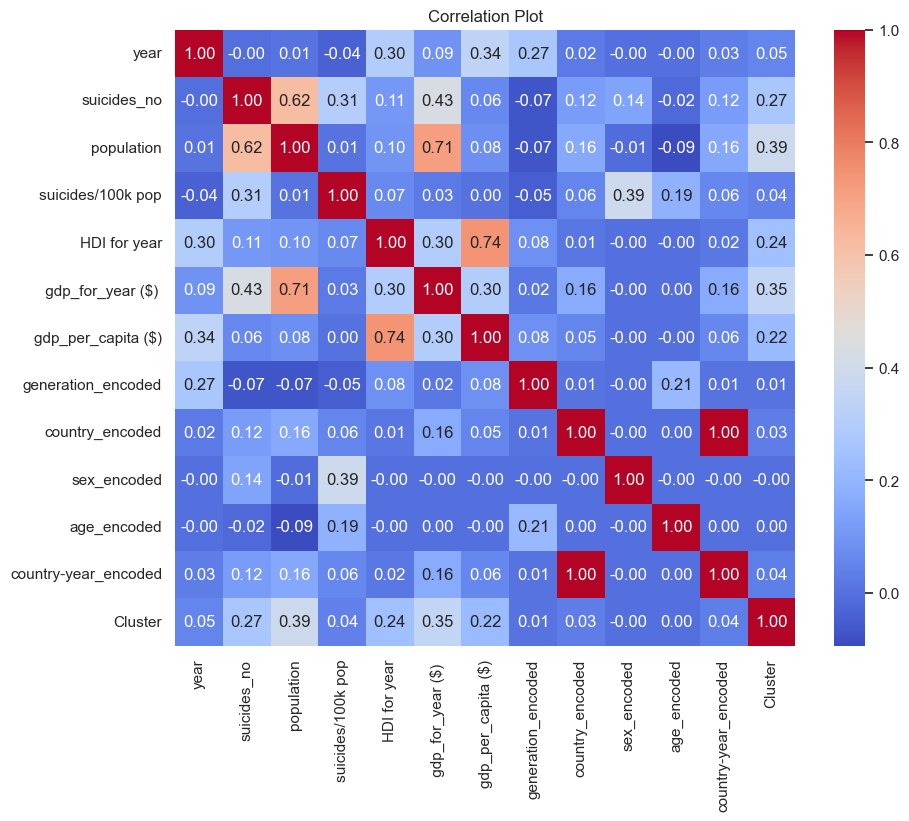

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot style (optional)
sns.set(style="white")

# Create the correlation plot using seaborn's heatmap function
plt.figure(figsize=(10, 8))  # Set the size of the plot (adjust as needed)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Plot")
plt.show()


In [142]:
from sklearn.metrics import silhouette_score

# data_array: The data used for FCM clustering (num_data_points x num_features)
# u: The membership matrix obtained from FCM clustering (num_clusters x num_data_points)

# Calculate the silhouette score
silhouette_avg = silhouette_score(data_array, u.argmax(axis=0))


In [143]:
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.7925628463061304


In [161]:
import pandas as pd

def analyze_csv_file(csv_file_path):
    # Read the CSV file into a DataFrame
    try:
        df = pd.read_csv(csv_file_path)
    except FileNotFoundError:
        print("File not found.")
        return
    except pd.errors.EmptyDataError:
        print("The file is empty.")
        return

    # Get column data types and counts
    column_info = []
    for col in df.columns:
        col_data_type = str(df[col].dtype)
        col_count = df[col].count()
        column_info.append((col, col_data_type, col_count))

    # Print column data types and counts in a table format
    print("{:<20} {:<20} {:<10}".format("Column Name", "Data Type", "Count"))
    print("="*50)
    for col_info in column_info:
        col_name, data_type, col_count = col_info
        print("{:<20} {:<20} {:<10}".format(col_name, data_type, col_count))

# Replace 'your_file.csv' with the actual path to your CSV file
csv_file_path = 'master.csv'
analyze_csv_file(csv_file_path)


Column Name          Data Type            Count     
country              object               27820     
year                 int64                27820     
sex                  object               27820     
age                  object               27820     
suicides_no          int64                27820     
population           int64                27820     
suicides/100k pop    float64              27820     
country-year         object               27820     
HDI for year         float64              8364      
 gdp_for_year ($)    object               27820     
gdp_per_capita ($)   int64                27820     
generation           object               27820     


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [165]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your data from a CSV file or generate synthetic data
# Replace 'data.csv' with your file name
data = pd.read_csv('imputed_dataset02.csv')
data_array = data.values


In [166]:
cluster_range = range(3, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    # Run FCM clustering
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(data_array.T, n_clusters, 2.0, error=0.005, maxiter=100, init=None)
    
    # Get cluster memberships for each data point
    cluster_membership = np.argmax(u, axis=0)
    
    # Calculate silhouette score
    score = silhouette_score(data_array, cluster_membership)
    silhouette_scores.append(score)


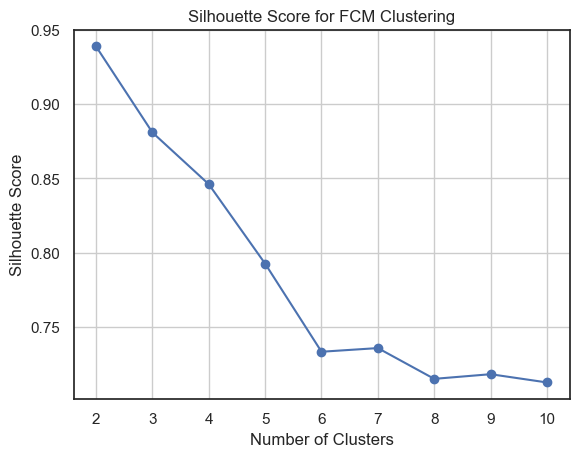

In [167]:
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for FCM Clustering')
plt.xticks(cluster_range)
plt.grid()
plt.show()
